### 2. 다항 회귀(Polynomial Regression) -비선형적(곡선)
- 다항식으로 표현된 회귀. 
- 언제나 앞의 <1장.선형회귀>처럼 선형적으로만 회귀선을 표현할 수는 없으므로 등장한 것.
- BUT, 다항 회귀 또한 선형 회귀의 일종!(독립변수(피처)는 비선형이나, 회귀계수는 여전히 선형이므로.)

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd

- 단항식 -> 다항식 변환
- 나온 poly_ftr 에다가 선형회귀를 적용하면 다항 회귀가 된다.

In [2]:
#단항식(1차)
X = np.arange(4).reshape(2,2)
print(X)

[[0 1]
 [2 3]]


In [3]:
#"2차"다항식 변환

#객체
poly = PolynomialFeatures(degree=2)
#학습
poly.fit(X)
#적용
poly_ftr = poly.transform(X)
print(poly_ftr)

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


- 3차

In [12]:
#"3차"다항식 변환

def polynomial_func(X):
    y = 1 + 2*X + X**2 + X**3
    return y

In [13]:
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)
print(X)
print(y)

[[0 1]
 [2 3]]
[[ 1  5]
 [17 43]]


In [15]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
poly_ftr

array([[ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
#구현된 poly_ftr에 이번에는 선형회귀까지 적용해 보자.
model = LinearRegression()
model.fit(poly_ftr, y)

print('회귀계수: ', np.round(model.coef_, 2))
print('회귀 shape: ', model.coef_.shape)

회귀계수:  [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
회귀 shape:  (2, 10)


- 위의 3차다항식 적용을 pipeline을 이용해 한번에!

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [22]:
def polynomial_func(X):
    y = 1 + 2*X + X**2 + X**3
    return y

#pipeline 객체로 간소하게 다항식 피처변환과 선형회귀 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model.fit(X, y)
print('회귀계수: ', np.round(model.named_steps['linear'].coef_, 2))

회귀계수:  [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


In [24]:
model.named_steps

{'poly': PolynomialFeatures(degree=3, include_bias=True, interaction_only=False),
 'linear': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False)}

#### 다항 회귀의 과소적합, 과대적합 코드 이해
- 다항식의 차수 많=모델 복잡해짐=과적합

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [26]:
def true_fun(X):
    return np.cos(1.5*np.pi*X)

#X, y값
 ##X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples=30
X = np.sort(np.random.rand(n_samples)) #uni(0,1)을 따르는 임의의 값 30개 생성-정렬돼서 반환됨
y = true_fun(X) +np.random.randn(n_samples) *0.1 #y는 X를 true_fun에 적용한 값+노이즈 값(정규분포를 따르는 임의의 값 30개)

In [27]:
print(X)
print(y)

[0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]
[ 1.0819082   0.87027612  1.14386208  0.70322051  0.78494746 -0.25265944
 -0.22066063 -0.26595867 -0.4562644  -0.53001927 -0.86481449 -0.99462675
 -0.87458603 -0.83407054 -0.77090649 -0.83476183 -1.03080067 -1.02544303
 -1.0788268  -1.00713288 -1.03009698 -0.63623922 -0.86230652 -0.75328767
 -0.70023795 -0.41043495 -0.50486767 -0.27907117 -0.25994628 -0.06189804]


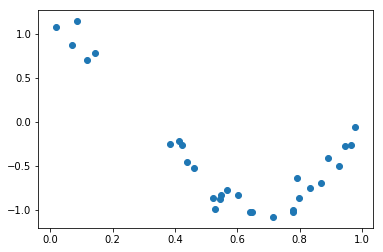

In [28]:
plt.scatter(X,y) #X는 균등분포를 따르므로 0과 1 사잇값, y는 코사인 그래프를 따르게 됨(노이즈가 있으므로 완전하진 않음)

- 이러한 데이터셋에서, 다항회귀를 적용하여 비선형적인 회귀선을 도출해낼 것임!

##### np.newaxis: reshape이랑 좀 다름. 
- 존재하는 numpy array의 차원을 늘려준다
- shape이 다른 array간 연산을 할때 유용
- 그런데 여기서 python이나 matlab등에 경험이 있으신 분들은 reshape라는 기능을 쓰면 되지 않느냐라고 반문 하실수 있겠네요. 하지만 reshape는 변환전 차원의 합과 변환후 차원의 합이 같아야 합니다.(4,1)을 변환한다는 기준으로 (2,2)는 reshape 가능한데 (4,1)을 (3,3)으로 부꿀수는 없다는 게 제약이 있는 거죠.* 4개의 원소를 2by2로 재배열한다는 느낌이 reshape인겁니다. 없는 걸 만들어내는 놈은 아닌거죠.
- https://azanewta.tistory.com/3

In [4]:
#1차원 
arr = np.arange(4)
arr.shape

(4,)

In [5]:
#reshape 사용하지 않고도 한번에 간단하게 array의 차원을 바꿀수 있음.(newaxis를 통해!)
# make it as row vector by inserting an axis along first dimension
row_vec = arr[np.newaxis, :]
print(row_vec.shape)

# make it as column vector by inserting an axis along second dimension
col_vec = arr[:, np.newaxis]
print(col_vec.shape)

(1, 4)
(4, 1)


- array 뒤에 []에 np.newaxis를 적용하면 이것이 적용된게 행이면 행을 1로 만듦
- array 뒤에 []에 np.newaxis를 적용하면 이것이 적용된게 열이면 열을 1로 만듦
- 마찬가지로 [np.newaxis, np.newaxis, ...] 이렇게 엄청 많이 적용할수도 있는데 그렇게 하면 또 그만큼 고차원으로 만들어짐.(1 x 1 x 1 x ...) 이니까

In [8]:
arr = np.arange(5*5).reshape(5,5) #2차원
arr_5D = arr[np.newaxis, ..., np.newaxis, np.newaxis] # 1 x (5x5) x 1 x 1 이렇게 만드는 것임
arr_5D.shape

(1, 5, 5, 1, 1)

###### 그래서 여기서도 X가 1차원이라서 np.newaxis를 이용해 차원을 바꿔볼 것이다: 다항회귀에서 X 값은 2차원만 가능!


 Degree 1의 회귀 계수는 [-1.61]
Degree 1의 MSE는 0.41

 Degree 2의 회귀 계수는 [-7.32  5.56]
Degree 2의 MSE는 0.06

 Degree 4의 회귀 계수는 [  0.47 -17.79  23.59  -7.26]
Degree 4의 MSE는 0.04

 Degree 7의 회귀 계수는 [ 5.20000e-01 -4.01900e+01  2.16520e+02 -6.47290e+02  1.01367e+03
 -7.70200e+02  2.25970e+02]
Degree 7의 MSE는 0.2

 Degree 10의 회귀 계수는 [-2.2550000e+01  5.3937000e+02 -6.3670400e+03  3.9317720e+04
 -1.4182671e+05  3.1487065e+05 -4.3617266e+05  3.6756501e+05
 -1.7245930e+05  3.4554690e+04]
Degree 10의 MSE는 1516.44

 Degree 15의 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08]
Degree 15의 MSE는 182815433.48


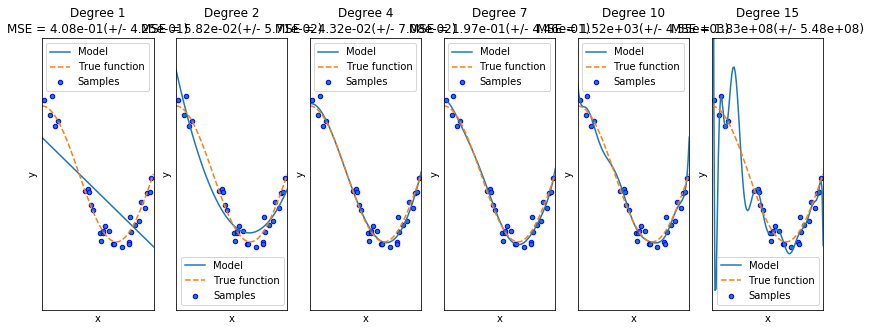

In [59]:
#차수를 1, 4, 15로 3가지 버전으로 그려보자.(갈수록 차수가 높아지니 과적합이 심화되겠지?)
plt.figure(figsize=(14, 5))
degrees = [1,2,4,7,10,15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1) #액자 틀을 잡아주기 위함.
    plt.setp(ax, xticks=(), yticks=()) #좀더 선 두께, 모양 등을 세밀히 조정하기 위함

    #개별 차수(degree)별로 polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i],include_bias=False)
    #선형회귀 모델 만들고 , 적용
    linear_regression = LinearRegression()
    pipeline = Pipeline([("poly", polynomial_features), ("linear", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y) #####이거 주의!! X의 차원 변경(전체row x 1) -왜냐면 pipeline 모델에 적용할때 차원은 항상 2차원!!

    #교차검증으로 다항회귀 평가
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    #회귀계수, MSE값 출력
    coefs = pipeline.named_steps['linear'].coef_ #pipeline에서는 꼭 named_steps를 이용해 어떤 것의 계수를 말하는건지 지정(여기서는 linear의 계수!)
    print('\n Degree {0}의 회귀 계수는 {1}'.format(degrees[i], np.round(coefs,2)))
    print('Degree {0}의 MSE는 {1}'.format(degrees[i], np.round(-1*np.mean(scores),2))) #np.mean(-1*scores)도 됨.

    #X_test 데이터 (0~1 사잇값으로 100개)만들고 plot 그려보기
    X_test = np.linspace(0, 1, 100)
    #예측값 곡선(pipeline 모델에 예측)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") #####여기서도 X_test를 (전체row x 1)로 바꿈
    #실제값 곡선(y값)
    plt.plot(X_test, true_fun(X_test), '--',label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std())) #MSE값은 숫자 출력해도 되는데 std이 커서 전부 큰수로 나옴

plt.show()

### 3. 규제(regulization) for "선형 회귀"
- 과적합을 방지하기 위해 RSS뒤에 패널티 항을 추가한 것. 이제 우리는 (RSS+패널티항)을 최소화하는 w(회귀계수)를 찾아야함.
- 모델이 복잡해질수록 회귀계수의 값이 커지게됨. 바로 여기서 우리는, (모델을 복잡하게 해서 RSS를 줄일것이냐?) VS (모델을 간단하게 해서 회귀계수의 값을 줄일것이냐?)를 고민한다.
- 이를 위해 나온 것이 하이퍼 파라미터인 람다(여기선 alpha). 람다값이 커지면 우리는 회귀계수 값을 줄이는데 힘쓰고 = 과적합 규제
- 람다값이 작아지면 우리는 RSS 값을 줄이는데 힘쓴다 = 잔차 줄임 = 과적합 발생.

#### 3-1. 릿지 회귀(Ridge)
- 패널티항이 제곱합으로 되어 있음. L2 규제라고도 함
- 람다가 커지면 회귀계수 값을 일정하게 줄인다.(0 정도로 줄이지만 완벽하게 0이 되진 않음)

In [1]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['TARGET'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
X_df = df.drop('TARGET', axis=1)
y_df = df['TARGET']

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=.3, random_state=156)

- 릿지 회귀 수행!(역시 객체로 만들고 그대로 하면 됨. LinearRegression() 이거를 Ridge()로 바꿨다고 생각)

In [4]:
#객체
ridge = Ridge(alpha = 10) #하이퍼파라미터는 'alpha'=람다

#cv 및 평가: cross_val_score()
neg_mse_scores = cross_val_score(ridge, X_df, y_df, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores) #결과는 cv개수인 5개가 나올 것이므로
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


- 앞에서 보스턴 주택 데이터로 그냥 선형회귀를 돌렸을 때 5.83 보다 더 적은 수치(5.52)! 
- 규제를 가했더니, 평가 결과가 더 적어졌다.(더 예측 성능이 좋아졌다.)(그만큼 실제값과 예측값의 차이가 줄어들었다는 뜻이므로)

##### alpha를 바꿔가며 avg_rmse 측정
- (알파가 커질수록 규제가 심해진다. = 회귀계수 값이 작아진다 = 예측 성능이 좋아진다 = rmse가 작아진다.)

In [5]:
#하이퍼 파라미터인 alpha를 계속 바꿔가면서 예측 성능을 평가해보자.
alphas = [0, 0.1, 1, 10, 100]

#alpha list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for a in alphas:
    #객체
    ridge = Ridge(alpha= a)
    #avg_rmse값 구함
    neg_mse_scores = cross_val_score(ridge, X_df, y_df, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores) #결과는 cv개수인 5개가 나올 것이므로
    avg_rmse = np.mean(rmse_scores)
    print('alpha {0}일 때, avg_rmse는 {1:.3f}'.format(a, avg_rmse))

alpha 0일 때, avg_rmse는 5.829
alpha 0.1일 때, avg_rmse는 5.788
alpha 1일 때, avg_rmse는 5.653
alpha 10일 때, avg_rmse는 5.518
alpha 100일 때, avg_rmse는 5.330


##### alpha를 바꿔가며 회귀계수 측정

In [6]:
alphas = [0, 0.1, 1, 10, 100]

#alpha list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for a in alphas:
    #객체
    ridge = Ridge(alpha= a)
    #학습
    ridge.fit(X_df, y_df)
    #회귀계수-그냥 숫자만 나오니까 항상 피처값과 매핑!! ->시리즈 변환.
    coeff = pd.Series(data=ridge.coef_, index=X_df.columns)
    print('\n 알파 값이 {0}일 때'.format(a))
    print(coeff)


 알파 값이 0일 때
CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64

 알파 값이 0.1일 때
CRIM       -0.107474
ZN          0.046572
INDUS       0.015999
CHAS        2.670019
NOX       -16.684645
RM          3.818233
AGE        -0.000269
DIS        -1.459626
RAD         0.303515
TAX        -0.012421
PTRATIO    -0.940759
B           0.009368
LSTAT      -0.525966
dtype: float64

 알파 값이 1일 때
CRIM       -0.104595
ZN          0.047443
INDUS      -0.008805
CHAS        2.552393
NOX       -10.777015
RM          3.854000
AGE        -0.005415
DIS        -1.372654
RAD         0.290142
TAX        -0.012912
PTRATIO    -0.876074
B           0.009673
LSTAT      -0.533343
dtype: float64

 알파 값이 10일 때
CRIM      -0.101435
ZN         0.049579
INDUS     -0.042962
CHAS       1.952021
N

,alpha: 0,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
NOX,-17.766611,-16.684645,-10.777015,-2.371619,-0.262847
RM,3.809865,3.818233,3.854000,3.702272,2.334536
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
DIS,-1.475567,-1.459626,-1.372654,-1.248808,-1.153390
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856


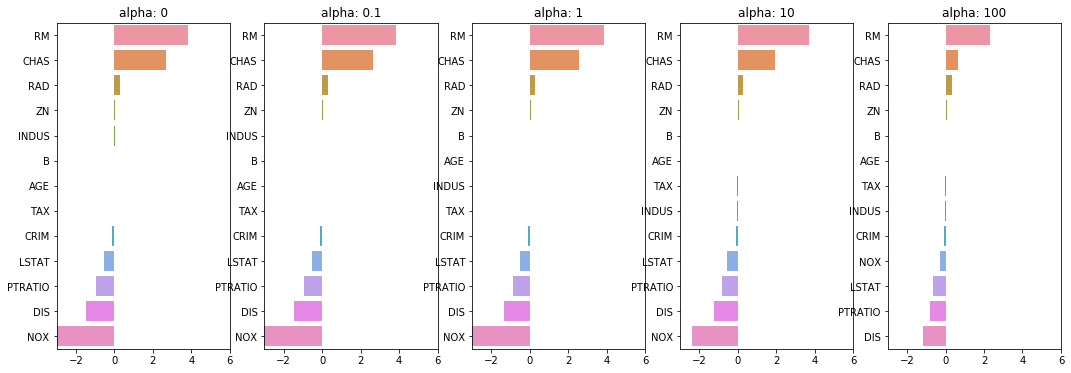

In [8]:
#시각화 및 데이터프레임으로 출력

import seaborn as sns
fig, axs = plt.subplots(1,5, figsize=(18,6))
coeff_df = pd.DataFrame()
alphas = [0, 0.1, 1, 10, 100]

for pos, alpha in enumerate(alphas):
    #객체
    ridge = Ridge(alpha=alpha)
    #학습
    ridge.fit(X_df, y_df) #X, y 데이터로 학습
    #회귀계수-그냥 숫자만 나오니까 항상 피처값과 매핑!! ->시리즈 변환.-->나중에 이것을 df으로 변환할 것임
    coeff = pd.Series(data=ridge.coef_, index=X_df.columns) #시리즈
    colname = 'alpha: '+str(alpha)
    coeff_df[colname]=coeff #df
    
    #시각화(회귀계수가 높은 순서대로 표현)--시리즈 이용
    coeff = coeff.sort_values(ascending=False) #내림차순
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
display(coeff_df) #for문 안에 집어넣으면 alpha당 한개씩 총 5개가 나옴. 그래서 for문 바깥에 써야 완성본이 출력됨.
plt.show()

In [9]:
#그냥 coeff_df 로 출력해도 df는 나오는데, 정렬이 안돼있어서.. 내림차순 정렬!
ridge_alphas=[0, 0.1, 1, 10, 100]
sort_columns = 'alpha: '+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_columns, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


#### 3-2. 라쏘 회귀(Lasso)
- 패널티항이 절댓값합으로 되어 있음. L1 규제라고도 함
- 람다가 커지면 회귀계수 값을 줄이는데, 원래 작았던 것들을 아예 0으로 만들어버림. --> 변수 선택 이라고도 함.

In [25]:
from sklearn.linear_model import Lasso, ElasticNet

- alpha 값을 변화시키면서 평균RMSE와 각 피처의 회귀계수(df)를 반환하는 함수: get_linear_reg_eval

In [41]:
def get_linear_reg_eval(model_name, params=None, X_df = None, y_df=None, verbose=True): #여기의 params는 alpha를 넣는 것
    
    coeff_df = pd.DataFrame()
    if verbose : print('#####', model_name, '#####')
        
    for p in params: #객체 생성
        if model_name == 'Ridge':
            model = Ridge(alpha=p)
        elif model_name == 'Lasso':
            model = Lasso(alpha=p)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=p, l1_ratio=0.7)
            
        #평균 rmse 반환
        neg_mse_scores = cross_val_score(model, X_df, y_df, scoring="neg_mean_squared_error", cv = 5)
        rmse_scores  = np.sqrt(-1 * neg_mse_scores) #결과는 cv개수인 5개가 나올 것이므로
        avg_rmse = np.mean(rmse_scores)
        print('alpha {0}일 때 avg_RMSE는: {1:.3f}'.format(p, avg_rmse))
        
        #학습
        model.fit(X_df, y_df)
        
        #df 만들기
        coeff = pd.Series(data=model.coef_, index=X_df.columns) #시리즈
        colname = 'alpha: '+str(p)
        coeff_df[colname]=coeff #df
        
    return coeff_df

In [42]:
alphas = [0.07, 0.1, 0.5, 1, 3]
get_linear_reg_eval('Lasso', alphas,  X_df, y_df, verbose=True)

##### Lasso #####
alpha 0.07일 때 avg_RMSE는: 5.612
alpha 0.1일 때 avg_RMSE는: 5.615
alpha 0.5일 때 avg_RMSE는: 5.669
alpha 1일 때 avg_RMSE는: 5.776
alpha 3일 때 avg_RMSE는: 6.189


,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,3.789725,3.703202,2.498212,0.949811,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
DIS,-1.176583,-1.160538,-0.936605,-0.668790,-0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602


#### 3-3. 엘라스틱넷 회귀(ElasticNet)
- L1규제와 L2 규제를 결합한 회귀.
- 원래 L1 규제만 사용하면 일부 피처의 회귀계수를 아예 0으로 만드는데, 이 경우 하이퍼 파라미터인 람다(알파)값에 의해 회귀계수값이 너무 심하게 좌지우지될 수 있기 때문에 이를 완화하기 위해 L2 규제도 함께 넣은 것.(왜냐면 L2는 절대로 모든 회귀계수값을 0으로 만들진 않으므로)
- 엘라스틱넷 회귀에서의 규제는 RSS + a*L1 + b*L2 이고, 하이퍼 파라미터 2개(alpha=a+b, l1_ratio=a/(a+b))이다. 보통 alpha값만 건들고 l1_ratio는 잘 안건든다. l1_ratio가 0이 되면 a=0이므로 그냥 릿지가 되고, l1_ratio가 1이 되면 b=0이므로 그냥 라쏘가 됨.

In [45]:
#l1_ratio는 이미 함수 안에 0.7로 고정되어 있음
alphas = [0.07, 0.1, 0.5, 1, 3]
get_linear_reg_eval('ElasticNet', alphas,  X_df, y_df, verbose=True)

##### ElasticNet #####
alpha 0.07일 때 avg_RMSE는: 5.542
alpha 0.1일 때 avg_RMSE는: 5.526
alpha 0.5일 때 avg_RMSE는: 5.467
alpha 1일 때 avg_RMSE는: 5.597
alpha 3일 때 avg_RMSE는: 6.068


,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.574162,3.414154,1.918419,0.938789,0.000000
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
DIS,-1.189438,-1.173647,-0.975902,-0.725174,-0.031208
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417


In [46]:
#내림차순 정렬
elastic_coef_df = get_linear_reg_eval('ElasticNet', alphas,  X_df, y_df, verbose=True)
sort_columns = 'alpha: '+str(alphas[0])
elastic_coef_df.sort_values(by=sort_columns, ascending=False)

##### ElasticNet #####
alpha 0.07일 때 avg_RMSE는: 5.542
alpha 0.1일 때 avg_RMSE는: 5.526
alpha 0.5일 때 avg_RMSE는: 5.467
alpha 1일 때 avg_RMSE는: 5.597
alpha 3일 때 avg_RMSE는: 6.068


,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


### 데이터 전처리 for "선형 회귀"
- 선형회귀의 경우에는 회귀분석을 적용하기 전, 데이터 전처리(피처전처리, 타겟전처리)를 미리 수행을 해놓고 적용하는 경우가 많다.
- 피처 전처리(X_df) : 표준화/정규화, 다항회귀, 로그변환
- 타겟 전처리(y_df) : 로그변환

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

- 전처리 함수

In [97]:
#method는 표준화/정규화/로그변환을 결정
#p_degree는 다항식 특성을 추가할 때 적용. 여기서는 degree를 2만 적용할 것임

def get_scaled_data(method='None', p_degree=None, input_data=None): #input_data에는 X_df(피처) or y_df(타깃)를 넣음
    if method == 'Standard': #표준화
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax': #정규화
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log': #로그변환
        scaled_data = np.log1p(input_data)
    else: ###이것을 꼭 써주기! method를 실행 후에 p_degree를 수행하려면 바꿔야함.
        scaled_data = input_data

    if p_degree != None: #다항식으로 넣으려고 한다면
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [105]:
def get_linear_reg_eval(model_name, params=None, X_df = None, y_df=None, verbose=True): #여기의 params는 alpha를 넣는 것
    
    coeff_df = pd.DataFrame()
    if verbose : print('#####', model_name, '#####')
        
    for p in params: #객체 생성
        if model_name == 'Ridge':
            model = Ridge(alpha=p)
        elif model_name == 'Lasso':
            model = Lasso(alpha=p)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=p, l1_ratio=0.7)
            
        #평균 rmse 반환
        neg_mse_scores = cross_val_score(model, X_df, y_df, scoring="neg_mean_squared_error", cv = 5)
        rmse_scores  = np.sqrt(-1 * neg_mse_scores) #결과는 cv개수인 5개가 나올 것이므로
        avg_rmse = np.mean(rmse_scores)
        print('alpha {0}일 때 avg_RMSE는: {1:.3f}'.format(p, avg_rmse))
        
        #학습
        model.fit(X_df, y_df)
        
        #df 만들기
        coeff = pd.Series(data=model.coef_, index=X_df.columns) #시리즈
        colname = 'alpha: '+str(p)
        coeff_df[colname]=coeff #df
        
    return display(coeff_df) ##df return 시 df는 for loop로 돌릴 경우 전부 다 하나씩 나오지 않음(한 셀에 df 여러개 못씀.) 
                                        #->이경우 display를 해주면 print(ndarray)와 같은 역할 = display(dataframe)

- 전처리 함수를 이용해 전처리를 수행하고, 알파값을 변환하여 RMSE값 반환

In [106]:
alphas = [0.1, 1, 10, 100]

scale_methods = [(None, None), ('Standard',None), ('Standard',2), ('MinMax', None), ('MinMax', 2), ('Log',None)] #6가지 방법

In [107]:
#전처리함수 X(피처)에만 적용
for s in scale_methods:
    X_scaled_data = get_scaled_data(method=s[0], p_degree=s[1], input_data =X_df)
    print('\n 변환 유형: {0}, 차수: {1}'.format(s[0], s[1])) #6번 출력
    New_X_scaled = pd.DataFrame(X_data_scaled)
    
    #모델은 릿지에 대해서만, 전처리 방식을 다르게 했을 때(X_scaled_data가 바뀌니까)-alpha값도 바꾸면서 RMSE 출력.
    get_linear_reg_eval('Ridge', params=alphas, X_df=New_X_scaled, y_df = y_df, verbose=True)


 변환 유형: None, 차수: None
##### Ridge #####
alpha 0.1일 때 avg_RMSE는: 5.826
alpha 1일 때 avg_RMSE는: 5.803
alpha 10일 때 avg_RMSE는: 5.637
alpha 100일 때 avg_RMSE는: 5.421


,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
0,-0.927301,-0.919871,-0.859051,-0.652004
1,1.080027,1.066461,0.954975,0.578885
2,0.138479,0.117385,-0.041327,-0.402318
3,0.682089,0.685127,0.707780,0.739944
4,-2.053909,-2.029010,-1.812611,-0.925045
5,2.675104,2.682754,2.742344,2.777933
6,0.018821,0.013158,-0.032383,-0.172802
7,-3.101353,-3.077340,-2.856756,-1.688537
8,2.654964,2.591538,2.097823,0.699906
9,-2.069961,-2.010558,-1.565395,-0.608373



 변환 유형: Standard, 차수: None
##### Ridge #####
alpha 0.1일 때 avg_RMSE는: 5.826
alpha 1일 때 avg_RMSE는: 5.803
alpha 10일 때 avg_RMSE는: 5.637
alpha 100일 때 avg_RMSE는: 5.421


,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
0,-0.927301,-0.919871,-0.859051,-0.652004
1,1.080027,1.066461,0.954975,0.578885
2,0.138479,0.117385,-0.041327,-0.402318
3,0.682089,0.685127,0.707780,0.739944
4,-2.053909,-2.029010,-1.812611,-0.925045
5,2.675104,2.682754,2.742344,2.777933
6,0.018821,0.013158,-0.032383,-0.172802
7,-3.101353,-3.077340,-2.856756,-1.688537
8,2.654964,2.591538,2.097823,0.699906
9,-2.069961,-2.010558,-1.565395,-0.608373



 변환 유형: Standard, 차수: 2
##### Ridge #####
alpha 0.1일 때 avg_RMSE는: 5.826
alpha 1일 때 avg_RMSE는: 5.803
alpha 10일 때 avg_RMSE는: 5.637
alpha 100일 때 avg_RMSE는: 5.421


,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
0,-0.927301,-0.919871,-0.859051,-0.652004
1,1.080027,1.066461,0.954975,0.578885
2,0.138479,0.117385,-0.041327,-0.402318
3,0.682089,0.685127,0.707780,0.739944
4,-2.053909,-2.029010,-1.812611,-0.925045
5,2.675104,2.682754,2.742344,2.777933
6,0.018821,0.013158,-0.032383,-0.172802
7,-3.101353,-3.077340,-2.856756,-1.688537
8,2.654964,2.591538,2.097823,0.699906
9,-2.069961,-2.010558,-1.565395,-0.608373



 변환 유형: MinMax, 차수: None
##### Ridge #####
alpha 0.1일 때 avg_RMSE는: 5.826
alpha 1일 때 avg_RMSE는: 5.803
alpha 10일 때 avg_RMSE는: 5.637
alpha 100일 때 avg_RMSE는: 5.421


,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
0,-0.927301,-0.919871,-0.859051,-0.652004
1,1.080027,1.066461,0.954975,0.578885
2,0.138479,0.117385,-0.041327,-0.402318
3,0.682089,0.685127,0.707780,0.739944
4,-2.053909,-2.029010,-1.812611,-0.925045
5,2.675104,2.682754,2.742344,2.777933
6,0.018821,0.013158,-0.032383,-0.172802
7,-3.101353,-3.077340,-2.856756,-1.688537
8,2.654964,2.591538,2.097823,0.699906
9,-2.069961,-2.010558,-1.565395,-0.608373



 변환 유형: MinMax, 차수: 2
##### Ridge #####
alpha 0.1일 때 avg_RMSE는: 5.826
alpha 1일 때 avg_RMSE는: 5.803
alpha 10일 때 avg_RMSE는: 5.637
alpha 100일 때 avg_RMSE는: 5.421


,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
0,-0.927301,-0.919871,-0.859051,-0.652004
1,1.080027,1.066461,0.954975,0.578885
2,0.138479,0.117385,-0.041327,-0.402318
3,0.682089,0.685127,0.707780,0.739944
4,-2.053909,-2.029010,-1.812611,-0.925045
5,2.675104,2.682754,2.742344,2.777933
6,0.018821,0.013158,-0.032383,-0.172802
7,-3.101353,-3.077340,-2.856756,-1.688537
8,2.654964,2.591538,2.097823,0.699906
9,-2.069961,-2.010558,-1.565395,-0.608373



 변환 유형: Log, 차수: None
##### Ridge #####
alpha 0.1일 때 avg_RMSE는: 5.826
alpha 1일 때 avg_RMSE는: 5.803
alpha 10일 때 avg_RMSE는: 5.637
alpha 100일 때 avg_RMSE는: 5.421


,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
0,-0.927301,-0.919871,-0.859051,-0.652004
1,1.080027,1.066461,0.954975,0.578885
2,0.138479,0.117385,-0.041327,-0.402318
3,0.682089,0.685127,0.707780,0.739944
4,-2.053909,-2.029010,-1.812611,-0.925045
5,2.675104,2.682754,2.742344,2.777933
6,0.018821,0.013158,-0.032383,-0.172802
7,-3.101353,-3.077340,-2.856756,-1.688537
8,2.654964,2.591538,2.097823,0.699906
9,-2.069961,-2.010558,-1.565395,-0.608373
